In [ ]:
!pip install blocksnet iduedu mapclassify -qq

In [ ]:
import geopandas as gpd
import os
import osmnx as ox

In [ ]:
data_path = '/content/' #Задаём путь до файла

In [ ]:
settl_polygon = gpd.read_file(os.path.join(data_path, 'settl_polygon_1.geojson'))
#local_crs = settl_polygon.estimate_utm_crs() # определяем локальную систему координат
settl_polygon

,fid,full_id,population,name,district,school,kindergarten,post,library,culture,atm,health,port,airport,shop,pristan,geometry
0,2.0,n457213574,544,Великовисочное,НАО,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,8.0,1.0,"MULTIPOLYGON (((5792155.415 10229376.956, 5792..."
1,3.0,n458077350,574,Усть-Кара,НАО,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,4.0,1.0,"MULTIPOLYGON (((7227539.899 10826968.038, 7227..."
2,4.0,n606607717,372,Коткино,НАО,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,4.0,1.0,"MULTIPOLYGON (((5693197.420 10164998.112, 5693..."
3,5.0,n606607725,104,Щелино,НАО,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,"MULTIPOLYGON (((5792919.768 10190786.368, 5792..."
4,6.0,n606607730,121,Каменка,НАО,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,"MULTIPOLYGON (((5776090.365 10296529.815, 5776..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,182.0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((5900113.533 10340564.551, 5900..."
175,183.0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((7130503.100 10300458.881, 7130..."
176,184.0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((4925656.953 9836118.283, 49256..."
177,NaN,None,None,Архангельск,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((4512672.021 9493417.106, 45127..."


In [ ]:
#settl_polygon.to_crs(local_crs)

In [ ]:
data_path_bounds = '/content/boundary_1.geojson'
bounds = gpd.read_file(data_path_bounds)
print(bounds)
bounds.to_crs(4326, inplace=True) #Задаём общую систему координат

    fid                                               name ISO3166-2  \
0  None  Ижемский район, Республика Коми, Северо-Западн...      None   

  wikipedia name_alt                                           geometry  
0      None     None  MULTIPOLYGON (((54.83198 65.24542, 54.82124 65...  


In [ ]:
#from iduedu import get_boundary

#bounds_bil = get_boundary(osm_id=151231) #Если нет полигона, выгружаем с осм
G = ox.graph_from_polygon(bounds.unary_union, network_type='all')

/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 296 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
from iduedu import get_drive_graph

road_graph = get_drive_graph(polygon=bounds.unary_union, additional_edgedata=['highway', 'maxspeed', 'reg', 'ref','name']) #Получаем дорожный граф

/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 296 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
from blocksnet import AccessibilityProcessor
AccessibilityProcessor._fix_graph(road_graph) #Фиксим граф, запустить обязательно
road_graph

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
!pip install contextily matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blocksnet 0.0.12 requires numpy==1.23.5, but you have numpy 2.2.0 which is incompatible.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 12.0.0 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
iduedu 0.1.2 requires numpy<2.0.0,>=1.23.5, but you have

In [ ]:
import contextily as ctx

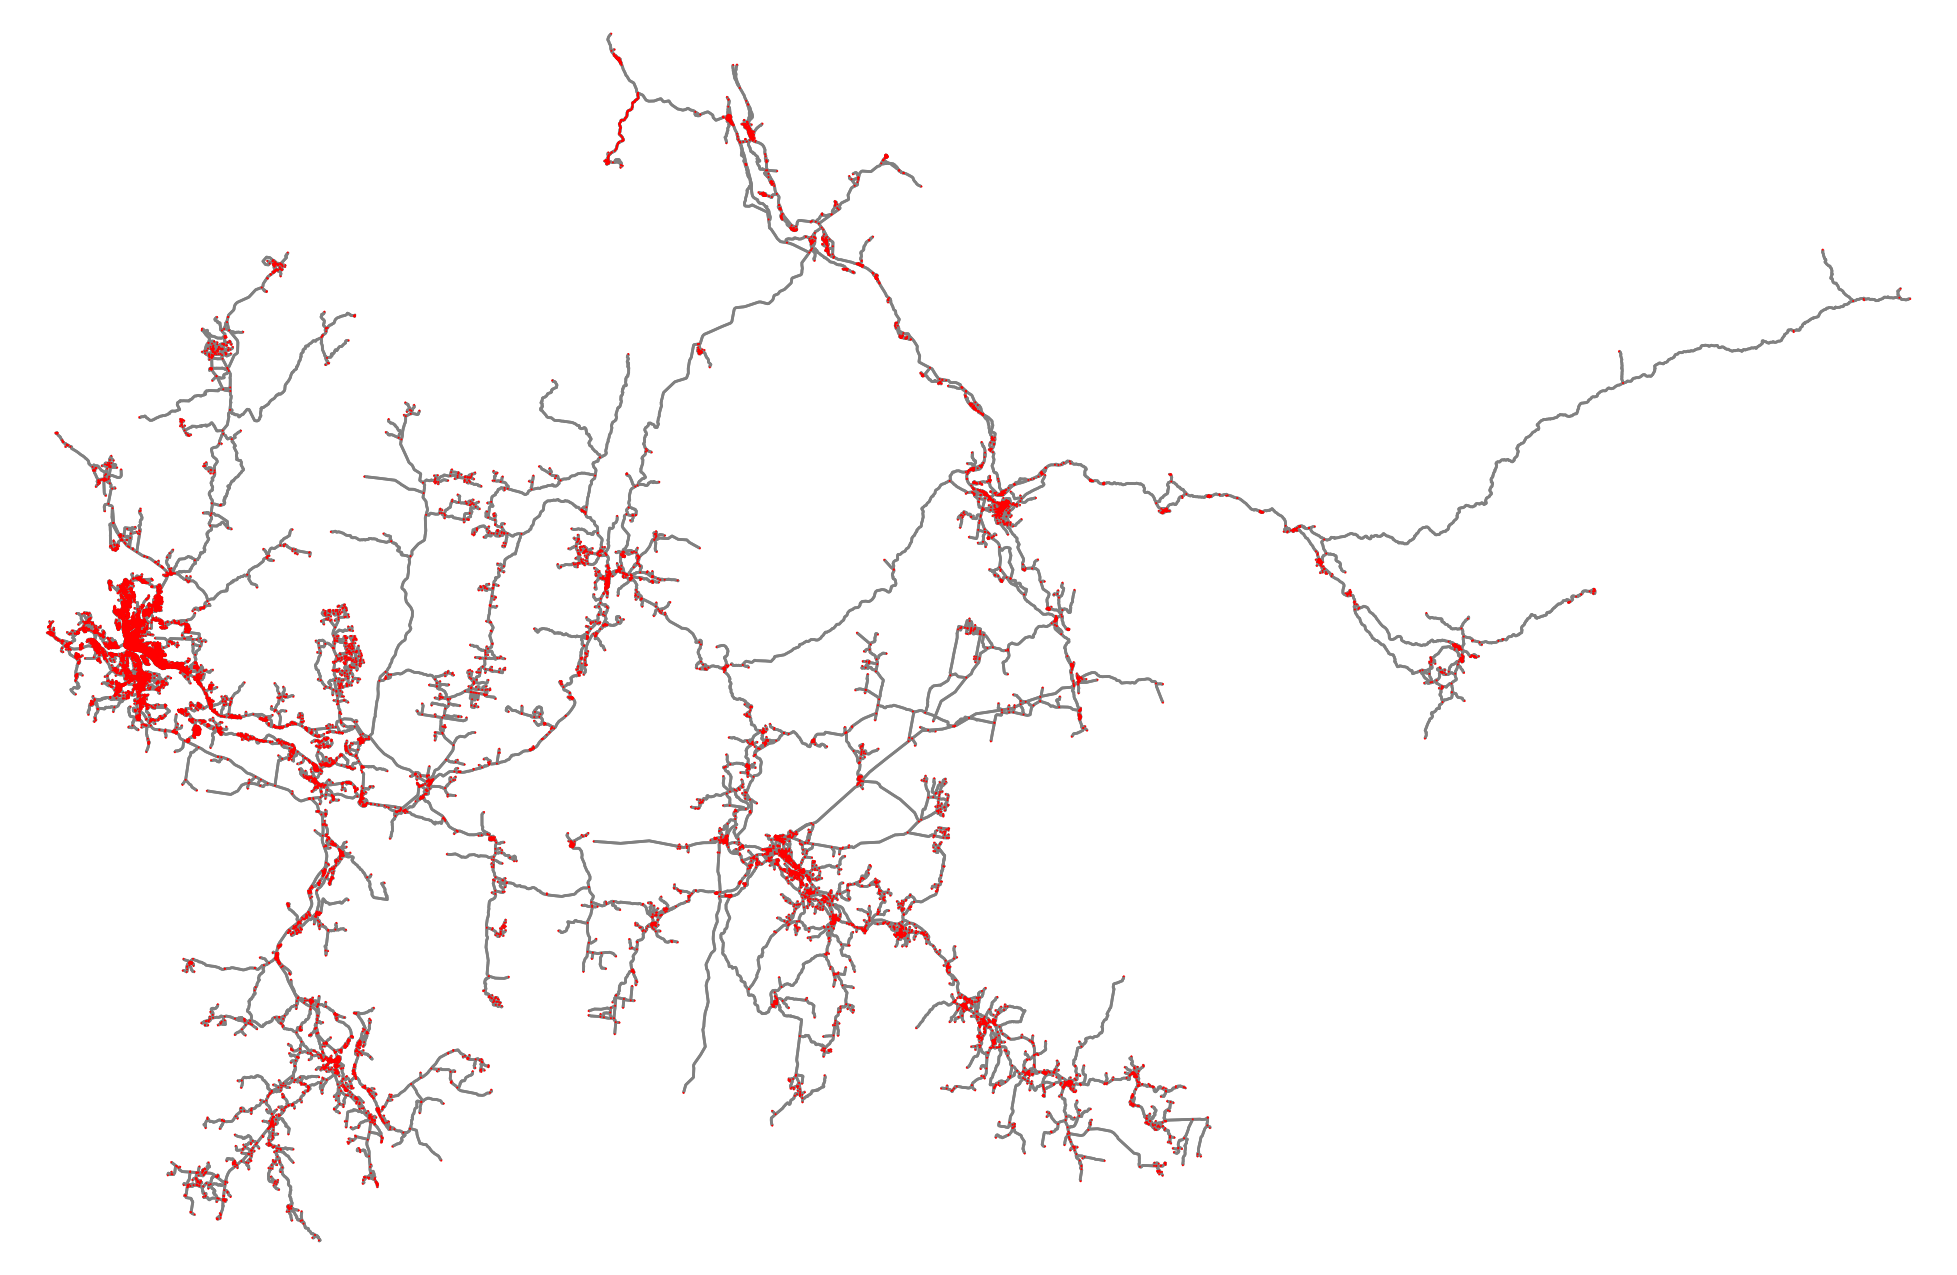

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = ox.plot_graph(G,
                    node_color='red', # цвет вершин
                    edge_color='grey', # цвет ребер
                    bgcolor='white', # цвет подложки
                    node_size=2, # размер верщин
                    edge_linewidth=2, # толщина ребер
                    figsize=(25,25)) # размер картинки
# Добавление подложки
ctx.add_basemap(ax, crs=G.graph['crs'], source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

In [ ]:
settl_polygon.to_crs(32639, inplace=True) #Устанавливаем систему координат графа, локальную

In [ ]:
ap = AccessibilityProcessor(settl_polygon) #Создаем экземпляр класса в переменной ap и передаем туда населённые пункты (их полигоны)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [ ]:
acc_mx = ap.get_accessibility_matrix(road_graph) #Запускаем расчёт матрицы доступности

In [ ]:
import pandas as pd

def convert_minutes_to_hours(df):
    # Преобразуем каждую ячейку DataFrame, поделив значение на 60
    converted_df = df.applymap(lambda x: x / 60)
    # Округляем результат до двух знаков после запятой
    converted_df = converted_df.round(3)
    return converted_df


acc_mx_hour = convert_minutes_to_hours(acc_mx) #Переводим время в часы

acc_mx_hour

<ipython-input-40-2f611a0821a2>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  converted_df = df.applymap(lambda x: x / 60)


,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
1,1.064,0.000,1.064,1.064,1.064,1.064,1.064,1.064,1.064,1.064,...,7.471,6.875,6.875,7.000,7.317,1.064,0.000,11.133,15.900,0.000
2,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
3,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
4,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
175,1.064,0.000,1.064,1.064,1.064,1.064,1.064,1.064,1.064,1.064,...,7.471,6.875,6.875,7.000,7.317,1.064,0.000,11.133,15.900,0.000
176,10.942,11.133,10.942,10.942,10.942,10.942,10.942,10.942,10.942,10.942,...,3.675,6.467,6.467,4.179,3.815,10.942,11.133,0.000,6.404,11.133
177,15.708,15.900,15.708,15.708,15.708,15.708,15.708,15.708,15.708,15.708,...,8.446,11.233,11.233,8.950,8.583,15.708,15.900,6.404,0.000,15.900


In [ ]:
acc_mx_hour.to_pickle(os.path.join(data_path, 'acc_mx_1.pickle'))

In [ ]:
import pickle
import pandas as pd

with open('acc_mx_1.pickle', 'rb') as file:
    df = pickle.load(file)

In [ ]:
# Получаем список названий поселений
names = settl_polygon['name'].values

# Переименовываем строки и столбцы во втором датафрейме
df.rename(index=dict(zip(df.index, names)), inplace=True)
df.rename(columns=dict(zip(df.columns, names)), inplace=True)
df

,Великовисочное,Усть-Кара,Коткино,Щелино,Каменка,Лабожское,Хонгурей,Оксино,Тельвиска,Макарово,...,Белощелье,Шегмас,Ларькино,Чучепала,Палащелье,None,None,None,Архангельск,Усинск
Великовисочное,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
Усть-Кара,1.064,0.000,1.064,1.064,1.064,1.064,1.064,1.064,1.064,1.064,...,7.471,6.875,6.875,7.000,7.317,1.064,0.000,11.133,15.900,0.000
Коткино,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
Щелино,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
Каменка,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
None,0.000,1.064,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,7.275,6.679,6.679,6.808,7.125,0.000,1.064,10.942,15.708,1.064
None,1.064,0.000,1.064,1.064,1.064,1.064,1.064,1.064,1.064,1.064,...,7.471,6.875,6.875,7.000,7.317,1.064,0.000,11.133,15.900,0.000
None,10.942,11.133,10.942,10.942,10.942,10.942,10.942,10.942,10.942,10.942,...,3.675,6.467,6.467,4.179,3.815,10.942,11.133,0.000,6.404,11.133
Архангельск,15.708,15.900,15.708,15.708,15.708,15.708,15.708,15.708,15.708,15.708,...,8.446,11.233,11.233,8.950,8.583,15.708,15.900,6.404,0.000,15.900
